# Data of Expedia (EXPE)

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
initial_data = yf.download("EXPE", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,97.720001,98.169998,93.790001,96.730003,96.371941,4849000
2020-03-03,96.470001,98.980003,93.690002,95.190002,94.837639,3376400
2020-03-04,96.220001,97.199997,93.010002,97.139999,96.780418,3954200
2020-03-05,94.290001,94.489998,90.599998,91.510002,91.171257,4449800
2020-03-06,88.260002,92.940002,87.989998,91.849998,91.510002,4773900


In [4]:
initial_data['Adj Close'].head()

Date
2020-03-02    96.371941
2020-03-03    94.837639
2020-03-04    96.780418
2020-03-05    91.171257
2020-03-06    91.510002
Name: Adj Close, dtype: float64

In [5]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [10]:
data.head()

,Adj Close
Date,
2020-03-02,96.371941
2020-03-03,94.837639
2020-03-04,96.780418
2020-03-05,91.171257
2020-03-06,91.510002


In [11]:
data.tail()

,Adj Close
Date,
2021-02-22,160.610001
2021-02-23,159.690002
2021-02-24,162.779999
2021-02-25,157.179993
2021-02-26,161.000000


# Graph of Adj Close price

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C2CBFF8B0>],
      dtype=object)

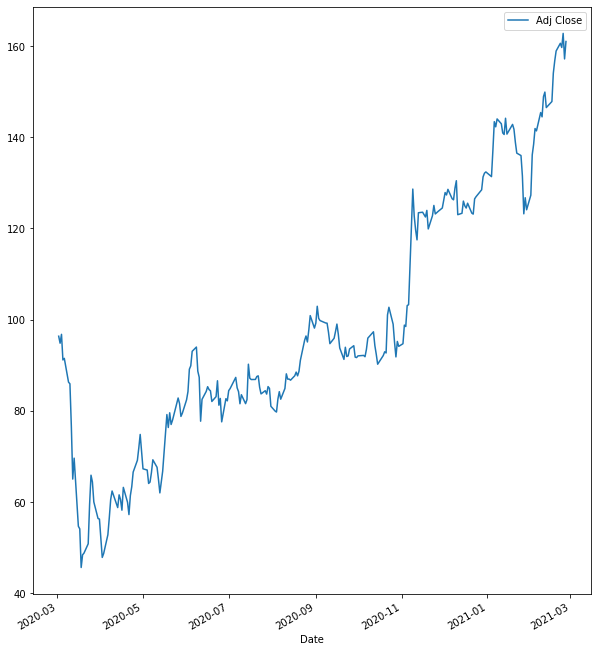

In [22]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [12]:
data.describe().round(2)

,Adj Close
count,251.00
mean,97.68
std,27.65
min,45.65
25%,81.83
50%,92.05
75%,123.35
max,162.78


### Changes over Time

In [13]:
data.diff().head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-1.534302
2020-03-04,1.942780
2020-03-05,-5.609161
2020-03-06,0.338745


In [15]:
data.diff().describe().round(2)

,Adj Close
count,250.00
mean,0.26
std,3.71
min,-14.93
25%,-1.95
50%,0.32
75%,2.32
max,25.37


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [16]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0159
2020-03-04,0.0205
2020-03-05,-0.0580
2020-03-06,0.0037


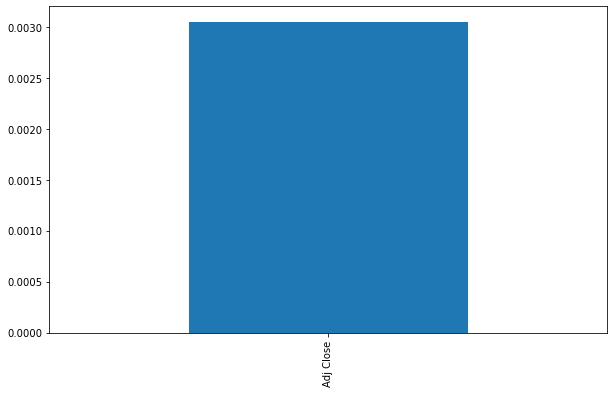

In [26]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0160
2020-03-04,0.0203
2020-03-05,-0.0597
2020-03-06,0.0037


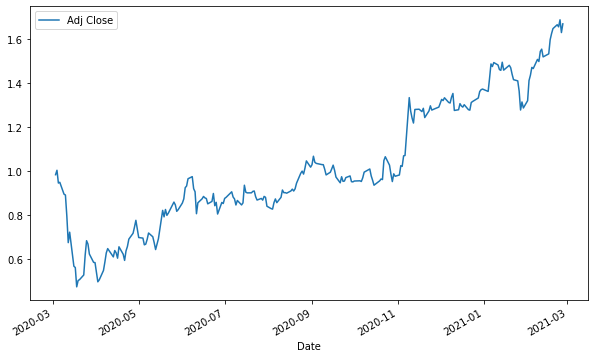

In [28]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [18]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,91.510002
2020-03-15,69.629997
2020-03-22,48.799999
2020-03-29,60.029999
2020-04-05,48.709999


In [19]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,56.270000
2020-04-30,70.980003
2020-05-31,79.480003
2020-06-30,82.199997
2020-07-31,81.010002


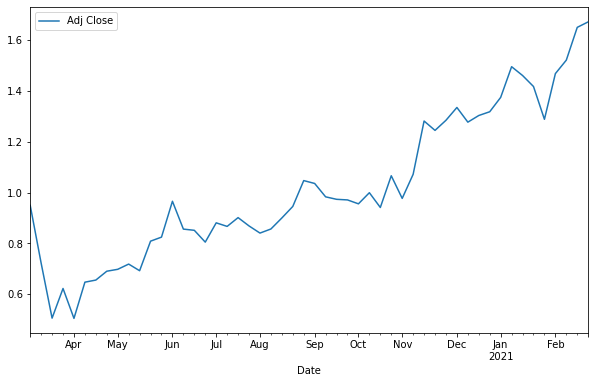

In [32]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

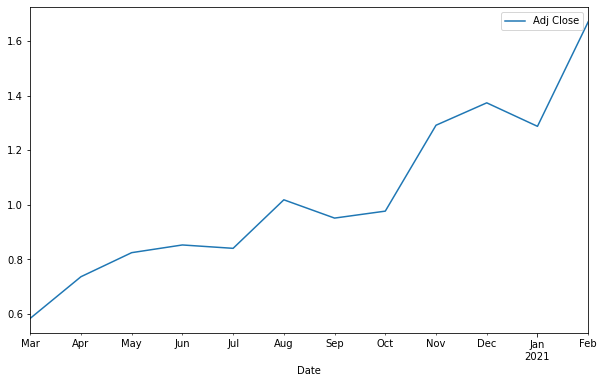

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# Annualised Return and Volatility

In [6]:
import numpy as np
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.01592062739482521,
 0.020485321697922033,
 -0.05795760619676327,
 0.00371548148246707,
 -0.056933657117793066]

In [7]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.016048721966344943,
 0.020278319722792988,
 -0.059705001381019,
 0.0037085961308047644,
 -0.05861864581993527]

In [8]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.76217034 and its annulized volatility is 0.70703384


In [9]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.51318928 and its annulized volatility is 0.70669977


# Last 6 months return and Volatility

In [10]:
return_6months=normal_return[:-125]
return_6months

[-0.01592062739482521,
 0.020485321697922033,
 -0.05795760619676327,
 0.00371548148246707,
 -0.056933657117793066,
 -0.004287401315155513,
 -0.10776215644529348,
 -0.15168902479677668,
 0.0705718984206661,
 -0.2144190302943842,
 -0.010603324003016331,
 -0.1565040201990057,
 0.06089810923053088,
 0.007639870525568081,
 0.04200818174406242,
 0.16971487368888064,
 0.10776731500914713,
 -0.022461613920906717,
 -0.06800193500670666,
 -0.06063633955801111,
 -0.002128017967434026,
 -0.07588413760488129,
 -0.07961537287785457,
 0.017760101614734392,
 0.08458227928596634,
 0.06965732278879705,
 0.07149178969251352,
 0.030883550048671254,
 -0.05815439538452174,
 0.04745706535259572,
 -0.016563826363013966,
 -0.03863936756150585,
 0.08588113870086955,
 -0.05172414417310736,
 -0.04503754342916654,
 0.07283839596411026,
 0.03174862945413432,
 0.05049709352810743,
 0.038756224168276225,
 0.03890086410200594,
 0.041620345846079085,
 -0.05144993157708747,
 -0.051986507000436714,
 -0.004012546719978321

In [11]:
dfnr_return_6months = pd.DataFrame(return_6months, columns = ['return_6months']) 
nr_six = dfnr_return_6months.mean() * len(dfnr)
nv_six = dfnr_return_6months.std() * (len(dfnr) ** 0.5)
print('The annulized 6 months return is %.8f and its annulized volatility is %.8f' % (nr_six,nv_six))

The annulized 6 months return is 0.40155949 and its annulized volatility is 0.85943722


In [12]:
log_return_6months=normal_return[:-125]
return_6months

[-0.01592062739482521,
 0.020485321697922033,
 -0.05795760619676327,
 0.00371548148246707,
 -0.056933657117793066,
 -0.004287401315155513,
 -0.10776215644529348,
 -0.15168902479677668,
 0.0705718984206661,
 -0.2144190302943842,
 -0.010603324003016331,
 -0.1565040201990057,
 0.06089810923053088,
 0.007639870525568081,
 0.04200818174406242,
 0.16971487368888064,
 0.10776731500914713,
 -0.022461613920906717,
 -0.06800193500670666,
 -0.06063633955801111,
 -0.002128017967434026,
 -0.07588413760488129,
 -0.07961537287785457,
 0.017760101614734392,
 0.08458227928596634,
 0.06965732278879705,
 0.07149178969251352,
 0.030883550048671254,
 -0.05815439538452174,
 0.04745706535259572,
 -0.016563826363013966,
 -0.03863936756150585,
 0.08588113870086955,
 -0.05172414417310736,
 -0.04503754342916654,
 0.07283839596411026,
 0.03174862945413432,
 0.05049709352810743,
 0.038756224168276225,
 0.03890086410200594,
 0.041620345846079085,
 -0.05144993157708747,
 -0.051986507000436714,
 -0.004012546719978321

In [13]:
dflr_return_6months= pd.DataFrame(return_6months, columns = ['log']) 
lr = dflr_return_6months.mean() * len(dflr)
lv = dflr_return_6months.std() * (len(dflr) ** 0.5)
print('The annulized log return for 6 months is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return for 6 months is 0.40155949 and its annulized volatility is 0.85943722


In [14]:
import numpy as np
import os

# Binomial Tree

In [15]:
S0 = 176.0              # spot stock price
K = 172.0               # strike
T = 4/52                 # maturity 
r = 0.0163                 # risk free rate 
sig = 0.707              # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [16]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [17]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [18]:
S

array([[176.        , 197.09672533, 220.72226782, 247.17975111],
       [  0.        , 157.16141376, 176.        , 197.09672533],
       [  0.        ,   0.        , 140.33926121, 157.16141376],
       [  0.        ,   0.        ,   0.        , 125.31770851]])

In [19]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47356987702516845

### Step 2: Find option value at each final node

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value:
Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [20]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.where (S_T>=K,1, 0.0)  
elif payoff =="put":
    V[:,-1] = np.where (K>S_T,1,0.0)  
V

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

### Step 3: Find option value at earlier nodes

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

#### Binary Put

In [21]:
# for Binary Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.5389321 , 0.27689712, 0.        , 0.        ],
       [0.        , 0.77508341, 0.52621015, 0.        ],
       [0.        , 0.        , 0.99958214, 1.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [13]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.5389320971134403


## Monte Carlo Simulation

It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [22]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [23]:
T = 4/52
r = 0.0163
sigma = 0.707
S0 = 176
K = 172

In [24]:
S = mcs_simulation_np(1000)

In [25]:
S = np.transpose(S)
S

array([[176.        , 175.78876174, 175.30044806, ..., 244.37541276,
        245.43093168, 247.62897646],
       [176.        , 176.07565992, 175.491121  , ..., 197.21732134,
        196.55465733, 197.95994113],
       [176.        , 177.4475748 , 175.07976702, ..., 119.09511722,
        117.76425048, 118.05777657],
       ...,
       [176.        , 176.29910165, 176.82764845, ..., 201.01307176,
        201.0189629 , 201.23940896],
       [176.        , 175.50379057, 174.50192032, ..., 211.78096263,
        212.99814973, 212.09241257],
       [176.        , 176.86166467, 176.34013768, ..., 124.21275742,
        123.15559566, 123.23661911]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

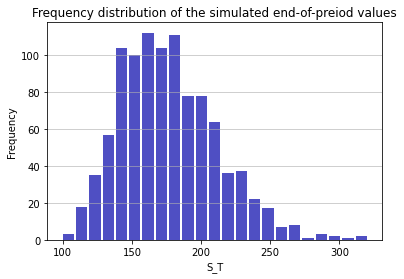

In [26]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [27]:
p = np.mean(np.where (K > S[:,-1],1,0)) 
print('Binary put', str(p))

Binary put 0.488


# Greeks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [2]:
def delta(S, K, T, r, vol):
    
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/ (vol * S * np.sqrt(T))
    
    return delta

In [3]:
delta (176,172,4/52,0.0163,0.707)

-0.01154151691320741

In [4]:
S = np.linspace(140,200,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 172, 4/52, 0.0163, 0.707)

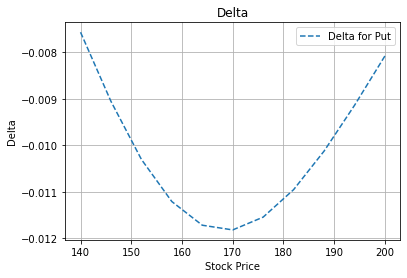

In [5]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [6]:
def gamma(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * T)
    
    return gamma

In [7]:
gamma(176,172,4/52,0.0163,0.707)

7.413574631219592e-05

In [8]:
S = np.linspace(100,250,12)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 172, 4/52, 0.0163, 0.707,)

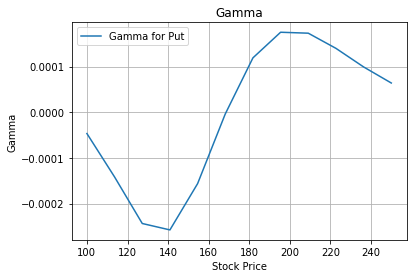

In [9]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [10]:
def speed(S,E,T,r,vol):
    d1= (np.log(S/E)+(r+0.5*vol**2)*T)/(vol*np.sqrt(T))
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    speed_put= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)/(vol**2*S**3*T))*(-2*d1+(1-(d1*d2))/(vol*np.sqrt(T)))
    return speed_put

In [11]:
speed(176,172,4/52,0.0163,0.707)

8.79297924708624e-06

In [12]:
S = np.linspace(100,250,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 172, 4/52, 0.0163, 0.707)

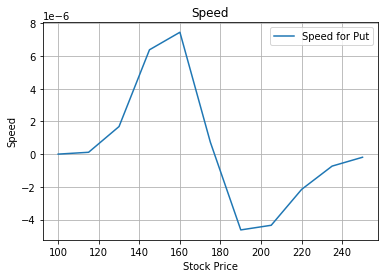

In [39]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [13]:
def theta(S, K, T, r,vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    theta = r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * ((d1/ 2 * T) - r/ vol * np.sqrt(T))
    
    return theta

In [14]:
theta(176,172,4/52,0.0163,0.707)

0.007124478653396872

In [15]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(176, 172, T[i], 0.0163,0.707)

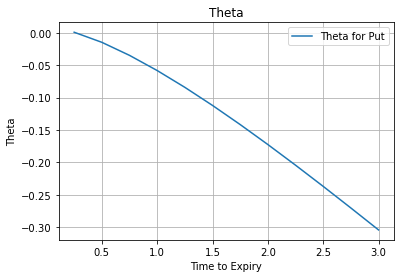

In [17]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [18]:
def vega(S, K, T, r, vol):
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega_put=(np.exp(-r * T)*si.norm.pdf(d2, 0.0, 1.0))*(np.sqrt(T))
    
    return vega_put

In [19]:
vega(176,172,4/52,0.0163,0.707)

0.11047184865724803

In [20]:
vol = np.linspace(0.1,0.9,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(176, 172, 4/52, 0.0163, vol[i])

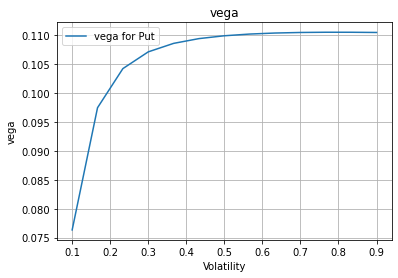

In [21]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('vega')
plt.title('vega')
plt.legend(['vega for Put'])

In [22]:
def rho(S,E,T,r,vol):
    
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) -(si.norm.cdf(- np.sqrt(T)/ vol)* np.exp(-r * T) * (1-si.norm.pdf(d2,0.0,1.0)))   
    
    return rho

In [23]:
rho(176,172,4/52,0.0163,0.707)

-0.24623301270583448

In [24]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(176, 172, 4/52, r[i], 0.707)

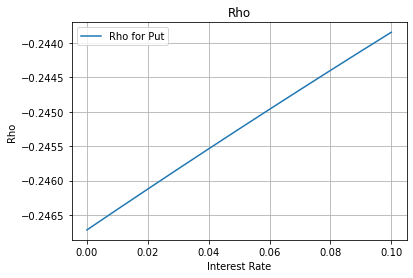

In [25]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])